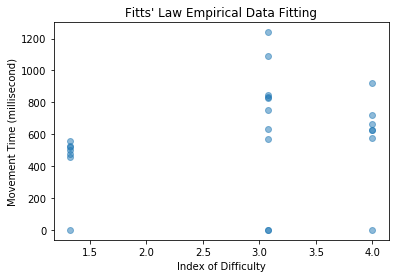

 
72.16 x + 378


In [ ]:
# Aalto_EngineeringForHumans, 2 Fitts' Law GUI, 25.6.2017
# need Matplotlib package for empirical data visualization

import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
import time as tm
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import string

# input parameters
global counter
counter = 0
global counterMax
counterMax = 1
# count the number of ID settings, for data fitting
global counterId
counterId = 0
global timeStamp
timeStamp = 0
global timeStampTemp
timeStampTemp = 0
global timeDelta
timeDelta = 0
global areaWidth
areaWidth = 700
global widthValue
widthValue = 40
global distanceValue
distanceValue = 250
# does idValue need to be global?
global idValue
idValue = 4.0
global areaCornerWidth
areaCornerWidth = (areaWidth - widthValue*2 - distanceValue)/2
# list of Index of Difficulty
global idList
idList = []
# list of Movement Time
global mtList
mtList = []

def onScaleChanged(event):
    global widthValue
    global distanceValue
    global areaCornerWidth
    global idValue
    global idList
    if scaleWidth.get() != widthValue:
        scaleWidth.config(troughcolor='SystemButtonFace')
    if scaleDistance.get() != distanceValue:
        scaleDistance.config(troughcolor='SystemButtonFace')
    #change the width of objects
    widthValue = int(varWidth.get())
    frameObj1.config(width=widthValue)
    frameObj2.config(width=widthValue)
    #change the distance between objects
    distanceValue = varDistance.get()
    areaCornerWidth = (areaWidth - widthValue*2 - distanceValue)/2
    frameDistance.config(width=distanceValue)
    frameNWCorner.config(width=areaCornerWidth)
    frameSWCorner.config(width=areaCornerWidth)
    frameNECorner.config(width=areaCornerWidth)
    frameSECorner.config(width=areaCornerWidth)
    idValue = np.log2(2*distanceValue/widthValue)
    labelId.config(text="ID = %0.2f" %idValue)

# limit counter entry is only digit
def onValidate(d, S):
    if S in string.digits:
        entryCounter.config(bg='white')
        buttonStart.config(bg='#D2AE9E', fg='black')
        return True
    else:
        return False

def onStartClicked(event):
    if not entryCounter.get():
        tk.messagebox.showinfo("Reminder", "Please input counter.")
    else:
        global counter
        counter = 0
        global counterMax
        counterMax = int(entryCounter.get())
        countDown.set(counterMax)
        labelCountDownText.grid(row=1, column=4, padx=10, sticky=tk.SE)
        labelCountDown.config(bg="#D2AE9E", fg='black')
        entryCounter.config(state=tk.DISABLED)
        scaleWidth.config(state=tk.DISABLED)
        scaleDistance.config(state=tk.DISABLED)
        buttonStart.config(bg="SystemButtonFace")
        scaleWidth.config(troughcolor='SystemButtonFace')
        scaleDistance.config(troughcolor='SystemButtonFace')
        # change object colours to indicate affordance
        obj1.config(bg='#4A857E', state=tk.NORMAL)
        obj2.config(bg='#4A857E', state=tk.NORMAL)
        obj1.bind("<ButtonRelease-1>", cursorMovement)
        obj1.bind("<Button-1>", onCounter)
        obj2.bind("<ButtonRelease-1>", cursorMovement)
        obj2.bind("<Button-1>", onCounter)

# def onCounter():
def onCounter(event):
    # print ("onCounter callback!")
    global counter
    if counter <= counterMax:
        counter += 1
        countDown.set(counterMax - counter + 1)

def cursorMovement(event):
    # print ("cursorMovement callback ;)")
    global timeStamp
    global timeStampTemp
    global counter
    global idList
    global mtList
    if counter == 1:
        timeStampTemp = tm.clock()
    if counter >= 1 and counter <= counterMax:
        # avoid clicking on the same object twice
        if event.widget == obj1:
            obj1.config(state=tk.DISABLED, bg="SystemButtonFace")
            obj2.config(state=tk.NORMAL, bg='#4A857E')
        if event.widget == obj2:
            obj1.config(state=tk.NORMAL, bg='#4A857E')
            obj2.config(state=tk.DISABLED, bg="SystemButtonFace")
        # timing cursor one-way movement time in millisecond
        timeStamp = tm.clock()
        timeDelta = (timeStamp - timeStampTemp)*1000
        timeStampTemp = timeStamp
        mtList.append(timeDelta)
        tk.Label(frameTime, text="time = %0.2f ms" %mtList[-1], anchor = tk.W).grid(row = 1 + counter, column=0, sticky=tk.N)
        idList.append(idValue)
        # plot movement time against index of Difficulty in real-time
        fig = plt.figure()
        graph = fig.add_subplot(111)
        graph.set(title="Fitts' Law Empirical Data Fitting", ylabel='Movement Time (millisecond)', xlabel='Index of Difficulty')
        graph.scatter(idList, mtList, alpha=0.5)
        display.clear_output(wait=True)
        plt.show()
    if counter > counterMax:
        obj1.config(state=tk.DISABLED, bg="SystemButtonFace")
        obj2.config(state=tk.DISABLED, bg="SystemButtonFace")
        buttonReset.config(bg='#D2AE9E')
        global counterId
        counterId += 1
        # print (counterId)
        if counterId >= 3:
            #linear regression
            z = np.polyfit(idList, mtList, 1)
            f = np.poly1d(z)
            print (f)

def onResetClicked(event):
    global counter
    counter = 0
    entryCounter.config(state=tk.NORMAL)
    scaleWidth.config(state=tk.NORMAL)
    scaleDistance.config(state=tk.NORMAL)
    buttonReset.config(bg='SystemButtonFace', fg='black')
    scaleWidth.config(troughcolor='#D2AE9E')
    scaleDistance.config(troughcolor='#D2AE9E')
    entryCounter.config(bg='#D2AE9E')
    labelCountDown.config(bg="SystemButtonFace", fg="SystemButtonFace")
    labelCountDownText.grid_forget()

def onClearDataClicked(event):
    print ("Clear Data!")

root = tk.Tk()
root.title("Fitts' Law: Empirical Experiment GUI")
root.resizable(width=False, height=False)
#experiment GUI
frameIdController = tk.Frame(root, width=areaWidth, height=100)
framePointingArea = tk.Frame(root, width=areaWidth, height=250, borderwidth=2, relief=tk.GROOVE)
frameTime = ttk.Labelframe(root, text='Delta Time')
frameIdController.grid(row=0, column=0, padx=10, pady=10, ipadx=10, ipady=10, sticky=tk.EW)
framePointingArea.grid(row=1, column=0, padx=10, pady=10, ipadx=10, ipady=10)
framePointingArea.grid_propagate(0)
frameTime.grid(row=0, column=1, rowspan=2, padx=10, pady=10, sticky=tk.NS)
frameTime.grid_propagate(0)

#width, distance controller
varWidth = tk.DoubleVar()
varWidth.set(widthValue)
varDistance = tk.DoubleVar()
varDistance.set(distanceValue)
scaleWidth = tk.Scale(frameIdController, from_=10, to=70, variable=varWidth, command=onScaleChanged, troughcolor='#D2AE9E', orient=tk.HORIZONTAL)
scaleDistance = tk.Scale(frameIdController, from_=50, to=500, variable=varDistance, command=onScaleChanged, troughcolor='#D2AE9E', orient=tk.HORIZONTAL)
vcmd = (frameIdController.register(onValidate), '%d', '%S')
textEntry = tk.StringVar()
entryCounter = tk.Entry(frameIdController, textvariable=textEntry, validate="key", validatecommand=vcmd, bg='#D2AE9E')
countDown = tk.IntVar()
labelCountDown = tk.Label(frameIdController, textvariable=countDown, bg='SystemButtonFace', fg='SystemButtonFace', font=("Arial", 20), width=5)
labelCountDownText = tk.Label(frameIdController, text="Remaining clicking(s):")
labelWidth = tk.Label(frameIdController, text="Width")
labelDistance = tk.Label(frameIdController, text="Distance")
labelId = tk.Label(frameIdController, text="Index of Difficulty = %0.2f" %idValue, bg='#9ED2CC', width=20)
labelCounter = tk.Label(frameIdController, text="Counter =")
labelCounterSuggestion = tk.Label(frameIdController, text="(Suggested counter: 10 - 20)")
buttonStart = tk.Button(frameIdController, text="Start", padx=10, pady=10)
buttonReset = tk.Button(frameIdController, text="Reset/Stop", padx=10, pady=10)
buttonClearData = tk.Button(frameIdController, text="Clear Data", padx=10, pady=10)

buttonReset.grid(row=0, column=0, padx=10, pady=10, ipadx=10, ipady=10, sticky=tk.EW)
buttonStart.grid(row=2, column=0, padx=10, pady=10, rowspan=2, ipadx=10, ipady=10, sticky=tk.EW)
labelWidth.grid(row=0, column=1, sticky=tk.W+tk.S)
scaleWidth.grid(row=0, column=2, sticky=tk.W+tk.E+tk.S)
labelDistance.grid(row=1, column=1, sticky=tk.W+tk.S)
scaleDistance.grid(row=1, column=2, sticky=tk.W+tk.E+tk.N)
labelCounter.grid(row=2, column=1, pady=20, sticky=tk.W+tk.S)
entryCounter.grid(row=2, column=2, pady=20, sticky=tk.EW+tk.S)
labelCounterSuggestion.grid(row=3, column=2, sticky=tk.NE)
labelId.grid(row=0, column=3, rowspan=4, padx=10, pady=10, sticky=tk.NSEW)
labelId.grid_propagate(0)
buttonClearData.grid(row=0, column=4, padx=10, pady=10, sticky=tk.NSEW)
labelCountDown.grid(row=2, column=4, rowspan=2, padx=10, pady=10, ipadx=10, ipady=10, sticky=tk.NSEW)

#Pointing area
frameNWCorner = tk.Frame(framePointingArea, width=areaCornerWidth, height=100)
frameSWCorner = tk.Frame(framePointingArea, width=areaCornerWidth, height=100)
frameNECorner = tk.Frame(framePointingArea, width=areaCornerWidth, height=100)
frameSECorner = tk.Frame(framePointingArea, width=areaCornerWidth, height=100)
frameDistance = tk.Frame(framePointingArea, width=distanceValue, height=50)
frameObj1 = tk.Frame(framePointingArea, width=widthValue, height=50)
frameObj2 = tk.Frame(framePointingArea, width=widthValue, height=50)
obj1=tk.Button(frameObj1, state=tk.DISABLED, activebackground='#9ED2CC')
obj2=tk.Button(frameObj2, state=tk.DISABLED, activebackground='#9ED2CC')
frameNWCorner.grid(row=0, column=0)
frameNECorner.grid(row=0, column=4)
frameObj1.grid(row=1, column=1)
frameObj1.rowconfigure(0, weight=1)
frameObj1.columnconfigure(0, weight=1)
frameObj1.grid_propagate(0)
obj1.grid(sticky=tk.NSEW)
frameDistance.grid(row=1, column=2)
frameDistance.grid_propagate(0)
frameObj2.grid(row=1, column=3)
frameObj2.rowconfigure(0, weight=1)
frameObj2.columnconfigure(0, weight=1)
frameObj2.grid_propagate(0)
obj2.grid(sticky=tk.NSEW)
frameSWCorner.grid(row=2, column=0)
frameSECorner.grid(row=2, column=4)

buttonStart.bind("<ButtonRelease-1>", onStartClicked)
buttonReset.bind("<ButtonRelease-1>", onResetClicked)
buttonClearData.bind("<ButtonRelease-1>", onClearDataClicked)

root.mainloop()
